In [1]:
import pandas as pd
from bertopic import BERTopic
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

c:\Users\ramirolobo\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
nltk.download('stopwords', download_dir='C:/Users/ramirolobo/nltk_data')
nltk.download('punkt', download_dir='C:/Users/ramirolobo/nltk_data')
nltk.data.path.append('C:/Users/ramirolobo/nltk_data')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:/Users/ramirolobo/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:/Users/ramirolobo/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
#load texts
text_chunks = pd.read_csv("data/text_chunks.csv")
texts = text_chunks["text"].tolist()

In [4]:
#define stopwords
stop_words = set(stopwords.words('english'))
custom_stopwords = {
    "chapter", "book", "section", "article",
    "i", "ii", "iii", "iv", "v", "vi", "vii", "viii",
    "ix", "x", "xi", "xii", "xiii", "xiv", "xv", "xvi", "xvii",
    "xviii", "xix", "xx", "xxi", "xxii", "xxiii", "xxiv", "xxv",
    "xxvi", "xxvii", "xxviii", "xxix", "xxx", "xxxii", "xxxiii",
    "xxxiv", "xxxv", "xxxvi", "xxxvii", "xxxviii", "xxxix", "xl",
}
all_stopwords = stop_words.union(custom_stopwords)

#function to preprocess text
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-z\s]", "", text)  # remove punctuation and numbers
    words = text.split()  # split by whitespace instead of word_tokenize
    filtered_words = [w for w in words if w not in all_stopwords]
    return " ".join(filtered_words)

In [5]:
#apply preprocessing
text_chunks["cleaned_text"] = text_chunks["text"].apply(preprocess_text)

In [6]:
text_chunks.head()

,Unnamed: 0,author,title,chunk,text,year,century,cleaned_text
0,1,Arrian,"The Anabasis of Alexander\r\nor, The History o...",0,the anabasis of alexander,130,2nd c. CE,anabasis alexander
1,2,Arrian,"The Anabasis of Alexander\r\nor, The History o...",1,the anabasis of alexander,130,2nd c. CE,anabasis alexander
2,3,Arrian,"The Anabasis of Alexander\r\nor, The History o...",2,or the history of the wars and conquests of ...,130,2nd c. CE,history wars conquests alexander great
3,4,Arrian,"The Anabasis of Alexander\r\nor, The History o...",3,literally translated with a commentary from th...,130,2nd c. CE,literally translated commentary greek arrian n...
4,5,Arrian,"The Anabasis of Alexander\r\nor, The History o...",4,e j chinnock ma llb london rector of dumfries...,130,2nd c. CE,e j chinnock llb london rector dumfries academy


In [15]:
cleaned_texts = text_chunks["cleaned_text"].dropna().tolist()

In [ ]:
#get vectorizer model to remove any residual stopwords
vectorizer_model = CountVectorizer(stop_words="english")

#fit BERTopic model
topic_model = BERTopic(
    #vectorizer_model=vectorizer_model,
    #calculate_probabilities=True,
    #verbose=True,
    #nr_topics="auto",  # Automatically determine the number of topics
    #language="english"  # Specify the language for stopwords
)

topics, probs = topic_model.fit_transform(cleaned_texts)

In [10]:
#topic_model.save("bertopic_model") #save model
topic_model = BERTopic.load("bertopic_model")  # load model

In [ ]:
topics = topic_model.get_topic_info()
#topics.to_csv("data/topics.csv", index=False)

In [19]:
#avoid training model each time
topics = pd.read_csv("data/topics.csv")

In [12]:
# top 15 topics
topics.loc[1:20, :]

,Topic,Count,Name,Representation,Representative_Docs
1,0,4446,0_french_english_england_france,"[french, english, england, france, ships, sea,...",[advantage wind english day fortyfour ships ac...
2,1,2679,1_athenians_lacedaemonians_athens_athenian,"[athenians, lacedaemonians, athens, athenian, ...",[terms armistice ships delivered number sixty ...
3,2,928,2_operations_lines_strategic_line,"[operations, lines, strategic, line, point, en...",[front operations space separates two armies u...
4,3,921,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...
5,4,554,4_sun_wu_tz_chi,"[sun, wu, tz, chi, yu, tsao, chinese, chang, c...",[return elder sun tz mentioned two passages sh...
6,5,353,5_object_war_destruction_therefore,"[object, war, destruction, therefore, politica...",[destruction enemys military force leading pri...
7,6,311,6_river_indus_called_rivers,"[river, indus, called, rivers, name, hebrew, e...",[unquestionable therefore let record indus lar...
8,7,307,7_eordaea_rha_ulm_crateas,"[eordaea, rha, ulm, crateas, ariaspians, mount...","[ulm magnesia victory malplaquet, peithon son ..."
9,8,177,8_military_generals_general_spirit,"[military, generals, general, spirit, virtue, ...",[assistance military virtue parts genius comma...
10,9,177,9_darius_persians_alexander_persian,"[darius, persians, alexander, persian, king, g...",[reflections fate darius alexander sent body d...


Topics seems to primarily identify authors rather than common themes between them.

In [10]:
topic_model.get_representative_docs(topics)

{-1: ['mahan december',
  'dumfries december',
  'january thirty twentytwo april thirty twenty difference time trincomalee saints nine hours half'],
 0: ['varus general horse man uncommon spirit skill encouraged men pursuing enemy disposed troops convenient places rest gave battle enemy enemys cavalry made bold stand foot relieving making general halt assist horse battle',
  'austrians directed operations upon meuse sarre moselle concert prussians part useless army upper rhine force one hundred twenty thousand men flanks protected troops could pushed forward even probable without changing direction war',
  'result first combat wiped account possible stop first success put second part battle coming day even king lost advantages first would always set second'],
 1: ['advantage wind english day fortyfour ships action dutch eighty many english said larger two fleets passed opposite tacks english windward tromp rear seeing dutch order battle badly formed ships two three lines overlapping',


In [31]:
#topics over time
timestamps = text_chunks['year'].tolist()
topics_over_time = topic_model.topics_over_time(cleaned_texts, timestamps=timestamps, nr_bins=7, global_tuning=False)

In [32]:
#visualize topics over time
topics_over_time_vis = topic_model.visualize_topics_over_time(topics_over_time)
topics_over_time_vis


In [13]:
#another topic model with fixed number of topics
topic_model_2 = BERTopic(nr_topics=50)
topics_2, probs_2 = topic_model_2.fit_transform(cleaned_texts)

KeyboardInterrupt: 

In [ ]:
#not meaningful topics
topics_2 = topic_model_2.get_topic_info()
topics_2.head(15)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,10,-1_tttttttttttttttttttttttttttttttttttttttt_co...,"[tttttttttttttttttttttttttttttttttttttttt, con...",[conquest difficulties national wars wars inst...
1,0,155,0_disastrous_notice__,"[disastrous, notice, , , , , , , , ]","[, notice, disastrous]"
2,1,4448,1_french_english_ships_sea,"[french, english, ships, sea, england, france,...",[ship first last might brought action beginnin...
3,2,17122,2_army_one_upon_would,"[army, one, upon, would, war, men, enemy, may,...",[danger could save baggage whole army cohorts ...


In [16]:
#add topics to text_chunks df
document_info = topic_model.get_document_info(cleaned_texts)
text_chunks['topic'] = document_info['Topic']

In [17]:
topic_by_author = (
    text_chunks.groupby("author")["topic"]
    .value_counts()
    .unstack(fill_value=0)
)

In [18]:
topic_by_author

topic,-1,0,1,2,3,4,5,6,7,8,...,72,73,74,75,76,77,78,79,80,81
author,,,,,,,,,,,,,,,,,,,,,
Arrian,1858,66,157,2,43,10,1,287,292,1,...,12,0,0,0,1,11,0,0,11,3
Caesar,1916,135,37,12,58,16,0,17,4,4,...,0,0,0,2,9,0,10,0,0,0
Clausewitz,934,30,2,258,444,1,324,1,0,76,...,0,0,2,0,0,0,0,0,0,0
Jomini,1616,247,28,521,43,6,11,1,7,61,...,0,10,1,1,0,1,0,11,0,6
Mahan,299,3782,10,39,41,8,8,1,2,12,...,0,2,0,0,0,0,0,0,0,0
Sun Tzu,560,21,3,83,42,512,5,0,2,18,...,0,0,0,1,0,0,1,0,0,2
Thucydides,702,165,2442,13,250,1,4,4,0,5,...,0,0,9,8,2,0,0,0,0,0


In [37]:
#topics with more than n occurrences across all chunks
n = 100
top_topics = topics[topics["Count"] > n]["Topic"].tolist()
top_topics.remove(15) # exclude noisy topic 15
top_topics = top_topics[1:]  # exclude noisy topic -1

In [20]:
#get top topics by author
top_topics_by_author = topic_by_author[top_topics]

In [21]:
# convert to proportion of total document counts per topic belonging to each author
topics_by_author_norm = topic_by_author.div(topic_by_author.sum(axis=1), axis=0)
top_topics_by_author_norm = top_topics_by_author.div(top_topics_by_author.sum(axis=1), axis=0) # get top topics by author normalized

In [22]:
top_topics_by_author_norm.head(10)

topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18
author,,,,,,,,,,,,,,,,,,
Arrian,0.044867,0.106730,0.001360,0.029232,0.006798,0.000680,0.195105,0.198504,0.000680,0.116927,0.000000,0.000680,0.027872,0.094494,0.097213,0.078178,0.000680,0.000000
Caesar,0.239362,0.065603,0.021277,0.102837,0.028369,0.000000,0.030142,0.007092,0.007092,0.000000,0.001773,0.000000,0.111702,0.000000,0.000000,0.003546,0.198582,0.182624
Clausewitz,0.025840,0.001723,0.222222,0.382429,0.000861,0.279070,0.000861,0.000000,0.065461,0.000861,0.016365,0.003445,0.000000,0.000000,0.000861,0.000000,0.000000,0.000000
Jomini,0.198075,0.022454,0.417803,0.034483,0.004812,0.008821,0.000802,0.005613,0.048917,0.000802,0.121893,0.129912,0.001604,0.001604,0.000000,0.000802,0.000802,0.000802
Mahan,0.967511,0.002558,0.009977,0.010489,0.002047,0.002047,0.000256,0.000512,0.003070,0.000000,0.000512,0.000256,0.000000,0.000256,0.000256,0.000000,0.000000,0.000256
Sun Tzu,0.030043,0.004292,0.118741,0.060086,0.732475,0.007153,0.000000,0.002861,0.025751,0.000000,0.000000,0.002861,0.011445,0.000000,0.000000,0.002861,0.000000,0.001431
Thucydides,0.056352,0.834016,0.004440,0.085383,0.000342,0.001366,0.001366,0.000000,0.001708,0.001025,0.000000,0.000342,0.011954,0.001366,0.000000,0.000342,0.000000,0.000000


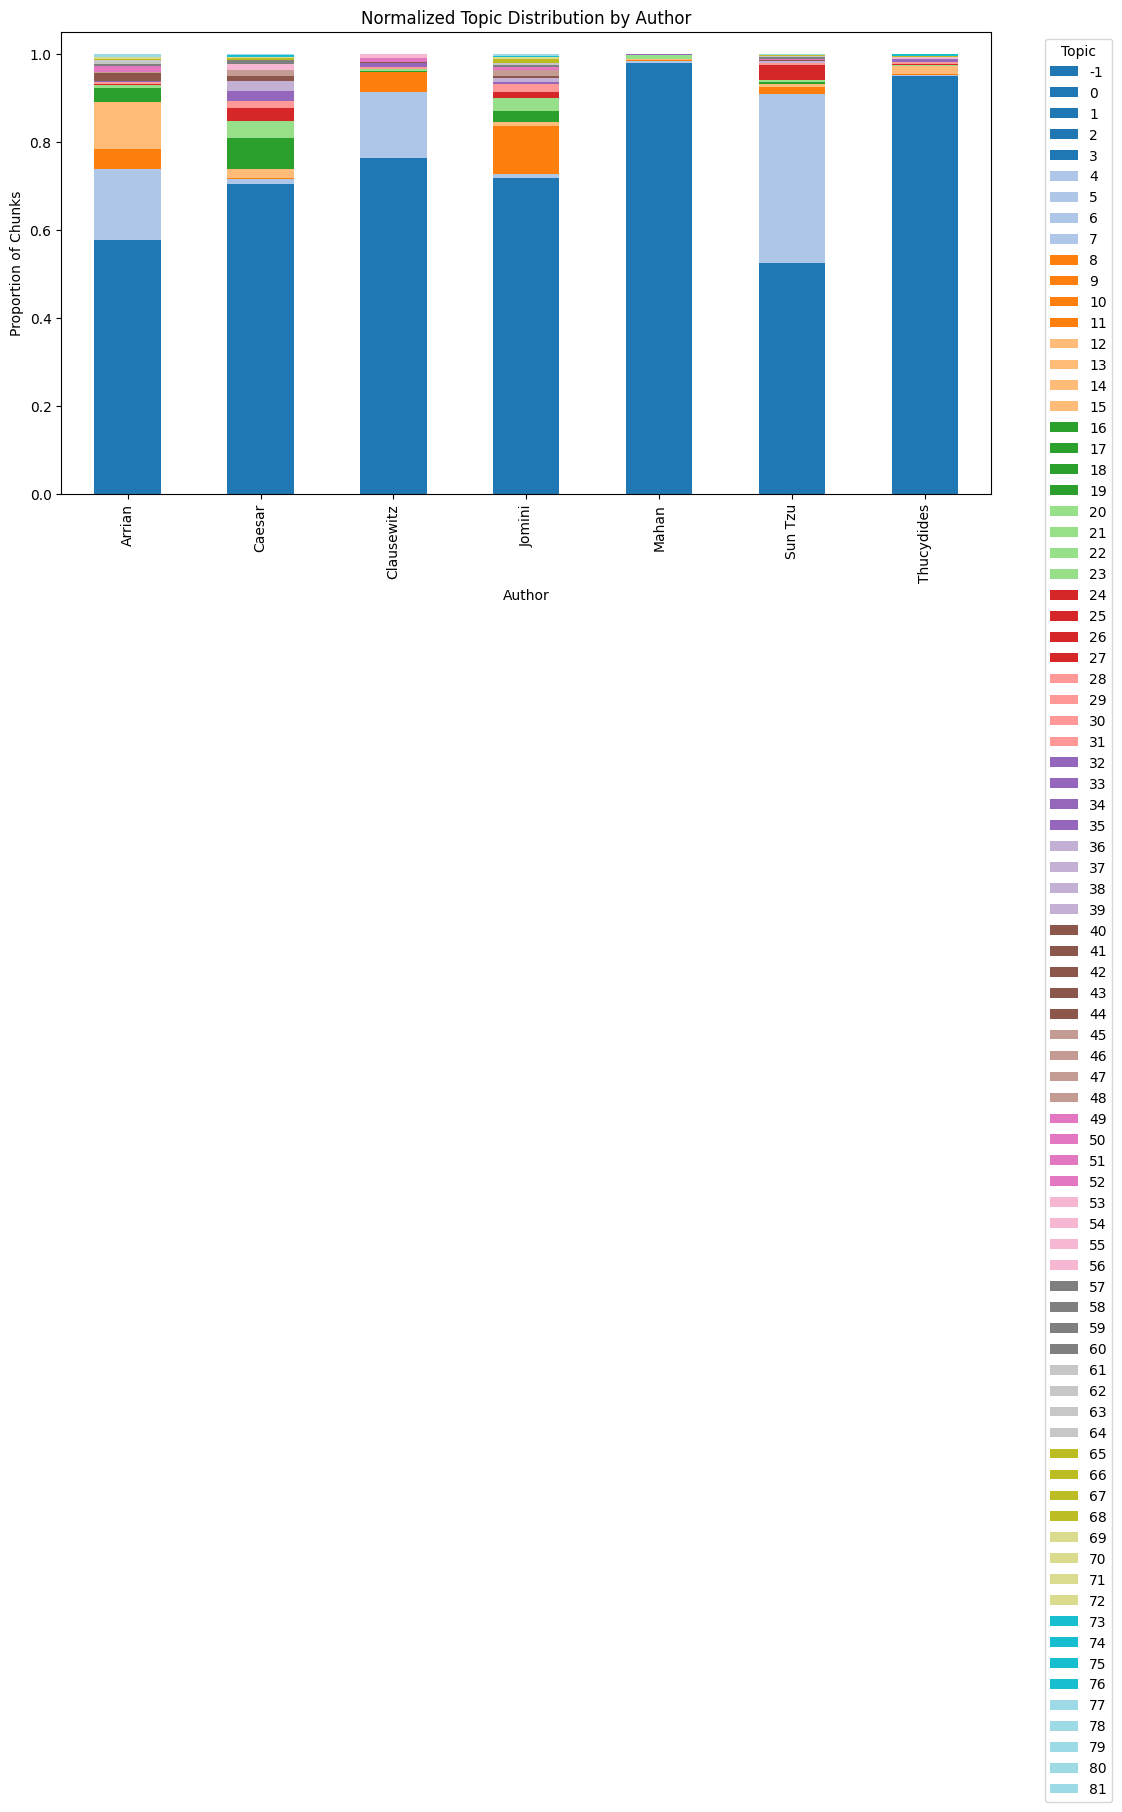

In [23]:
import matplotlib.pyplot as plt
#topics by author
topics_by_author_norm.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title("Normalized Topic Distribution by Author")
plt.xlabel("Author")
plt.ylabel("Proportion of Chunks")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


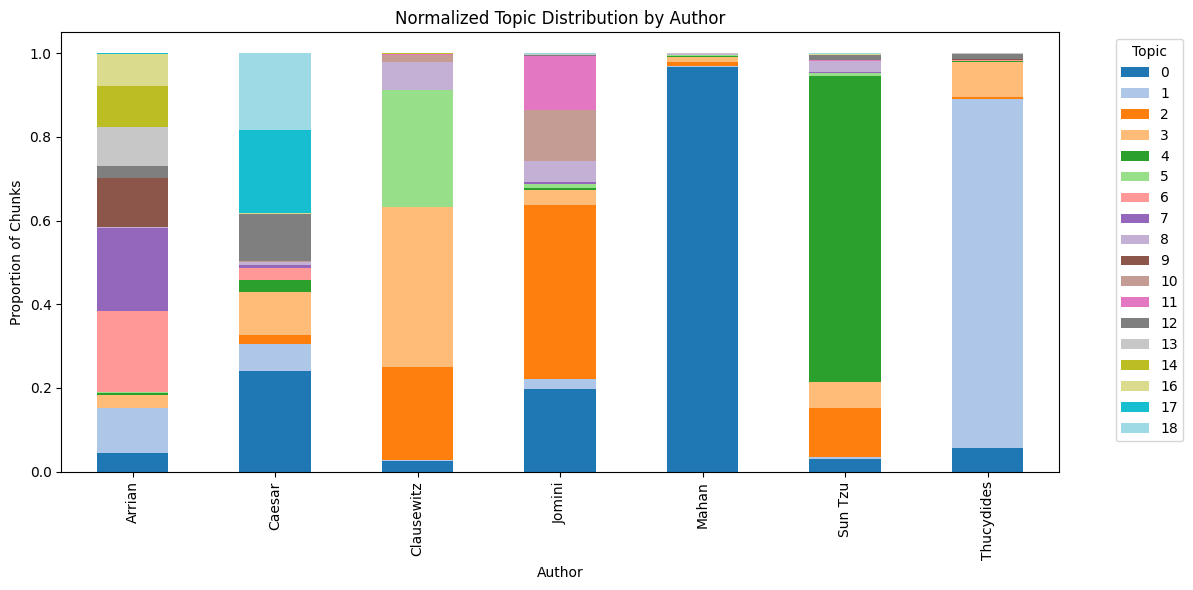

In [25]:
#top topics by author
top_topics_by_author_norm.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title("Normalized Topic Distribution by Author")
plt.xlabel("Author")
plt.ylabel("Proportion of Chunks")
plt.legend(title="Topic", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Almost all of Mahan's documents texts under topic 0. Similarly, for Thucydides almost all topics fall under Topic 1 and for Sun Tzu almsot all of his texts fall under Topic 4. For the remaining four authors, there is a larger degree of variation in the topics their texts were classified. Clausewitz's texts largely fall under topics 2, 3, and 5. Jomini's primarily fall under topics 0, 2, 10, and 11. 

In [26]:
top_topics_by_author

topic,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,18
author,,,,,,,,,,,,,,,,,,
Arrian,66,157,2,43,10,1,287,292,1,172,0,1,41,139,143,115,1,0
Caesar,135,37,12,58,16,0,17,4,4,0,1,0,63,0,0,2,112,103
Clausewitz,30,2,258,444,1,324,1,0,76,1,19,4,0,0,1,0,0,0
Jomini,247,28,521,43,6,11,1,7,61,1,152,162,2,2,0,1,1,1
Mahan,3782,10,39,41,8,8,1,2,12,0,2,1,0,1,1,0,0,1
Sun Tzu,21,3,83,42,512,5,0,2,18,0,0,2,8,0,0,2,0,1
Thucydides,165,2442,13,250,1,4,4,0,5,3,0,1,35,4,0,1,0,0


In [27]:
topic_by_author = topic_by_author.drop(-1, axis=1)

In [28]:
author_by_topic_norm = topic_by_author.div(topic_by_author.sum(axis=0), axis=1).T
author_by_top_topics = author_by_topic_norm.loc[top_topics, :]

In [29]:
author_by_top_topics

author,Arrian,Caesar,Clausewitz,Jomini,Mahan,Sun Tzu,Thucydides
topic,,,,,,,
0,0.014845,0.030364,0.006748,0.055556,0.850652,0.004723,0.037112
1,0.058604,0.013811,0.000747,0.010452,0.003733,0.001120,0.911534
2,0.002155,0.012931,0.278017,0.561422,0.042026,0.089440,0.014009
3,0.046688,0.062975,0.482085,0.046688,0.044517,0.045603,0.271444
4,0.018051,0.028881,0.001805,0.010830,0.014440,0.924188,0.001805
5,0.002833,0.000000,0.917847,0.031161,0.022663,0.014164,0.011331
6,0.922830,0.054662,0.003215,0.003215,0.003215,0.000000,0.012862
7,0.951140,0.013029,0.000000,0.022801,0.006515,0.006515,0.000000
8,0.005650,0.022599,0.429379,0.344633,0.067797,0.101695,0.028249


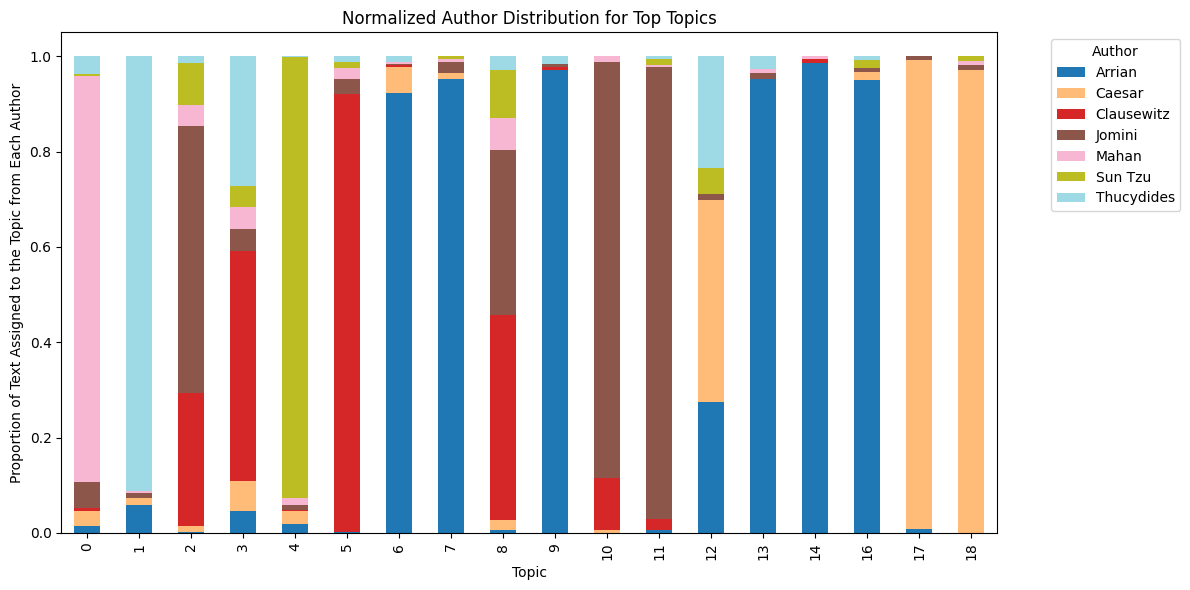

In [30]:
author_by_top_topics.plot(
    kind='bar',
    stacked=True,
    colormap='tab20',
    figsize=(12, 6)
)

plt.title("Normalized Author Distribution for Top Topics")
plt.xlabel("Topic")  # <-- Corrected
plt.ylabel("Proportion of Text Assigned to the Topic from Each Author")  # <-- Corrected
plt.legend(title="Author", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We see that most of the top topics generated by BERTopic are attributable to a single author. Topics 2, 3, 8, and 12 seem to capture some general themes across authors. 

In [42]:
top_topics

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18]

In [45]:
top_topics_df = topics[topics["Topic"].isin(top_topics)]

In [46]:
top_topics_df

,Topic,Count,Name,Representation,Representative_Docs
1,0,4446,0_french_english_england_france,"[french, english, england, france, ships, sea,...",[advantage wind english day fortyfour ships ac...
2,1,2679,1_athenians_lacedaemonians_athens_athenian,"[athenians, lacedaemonians, athens, athenian, ...",[terms armistice ships delivered number sixty ...
3,2,928,2_operations_lines_strategic_line,"[operations, lines, strategic, line, point, en...",[front operations space separates two armies u...
4,3,921,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...
5,4,554,4_sun_wu_tz_chi,"[sun, wu, tz, chi, yu, tsao, chinese, chang, c...",[return elder sun tz mentioned two passages sh...
6,5,353,5_object_war_destruction_therefore,"[object, war, destruction, therefore, politica...",[destruction enemys military force leading pri...
7,6,311,6_river_indus_called_rivers,"[river, indus, called, rivers, name, hebrew, e...",[unquestionable therefore let record indus lar...
8,7,307,7_eordaea_rha_ulm_crateas,"[eordaea, rha, ulm, crateas, ariaspians, mount...","[ulm magnesia victory malplaquet, peithon son ..."
9,8,177,8_military_generals_general_spirit,"[military, generals, general, spirit, virtue, ...",[assistance military virtue parts genius comma...
10,9,177,9_darius_persians_alexander_persian,"[darius, persians, alexander, persian, king, g...",[reflections fate darius alexander sent body d...


| Topic # | Suggested Name                          | Representative Keywords                                      | Primary Author(s)            |
|---------|------------------------------------------|--------------------------------------------------------------|------------------------------|
| 0       | Naval Warfare and European Powers        | french, english, england, france, ships, sea                 | Mahan                        |
| 1       | Athenian Strategy              | athenians, lacedaemonians, athens, athenian, triremes       | Thucydides                   |
| 2       | Strategic Operations and Lines           | operations, lines, strategic, point, enemy                   | Jomini, Clausewitz           |
| 3       | Theory of War               | theory, mind, must, therefore, principles                    | Clausewitz, Thucydides   |
| 4       | Sun Tzu       | sun, wu, tz, chi, yu, tsao, chinese                          | Sun Tzu                      |
| 5       | War Aims and Political Objectives        | object, war, destruction, political, policy                  | Clausewitz                   |
| 6       | Geography and  Terrain           | river, indus, rivers, hebrew, terrain                        | Arrian                       |
| 7       | Specific Battles and Locations           | eordaea, ulm, crateas, ariaspians, victory                   | Arrian               |
| 8       | Leadership and Military Virtue           | military, generals, general, spirit, virtue                  | Clausewitz, Jomini         |
| 9       | Persian Campaigns of Alexander           | darius, persians, alexander, king, body                      | Arrian                       |
| 10      | Austro-European Campaigns                | rhine, archduke, austrians, austrian, danube                | Jomini                       |
| 11      | Deployment and Army Structure            | divisions, battalions, columns, deployed, skirmishers       | Jomini           |
| 12      | Military Engineering      | wall, mound, engines, towers, stones                        | Caesar, Arrian, Thucydides    |
| 13      | Macedonian Tactics          | macedonians, city, phalanx, wall, assault                   | Arrian                       |
| 14      | Alexander's Legacy and Speeches          | alexander, speech, king, death, callisthenes                | Arrian                       |
| 16      | Classical Source Referencing             | arrian, herodotus, homer, xenophon                      | Arrian      |
| 17      | Caesar’s Roman Governance                | caesar, roman, rome, senate, public                         | Julius Caesar                |
| 18      | Caesar’s Military Campaigns              | caesar, camp, legions, labienus, vercingetorix              | Julius Caesar                |


In [92]:
#create map of topic names
topic_name_map = {
    0: "Naval Warfare and European Powers",
    1: "Athenian Strategy",
    2: "Strategic Operations and Lines",
    3: "Theory of War",
    4: "Sun Tzu",
    5: "War Aims and Political Objectives",
    6: "Geography and Terrain",
    7: "Specific Battles and Locations",
    8: "Leadership and Military Virtue",
    9: "Persian Campaigns of Alexander",
    10: "Austro-European Campaigns",
    11: "Deployment and Army Structure",
    12: "Military Engineering",
    13: "Macedonian Tactics",
    14: "Alexander's Legacy and Speeches",
    16: "Classical Source Referencing",
    17: "Caesar’s Roman Governance",
    18: "Caesar’s Military Campaigns"
}


Compare semantics with topics that have multiple authors

In [93]:
#get document info for topics of interest
topics_of_interest = [2, 3, 5, 8, 12]
#add authors to document info
document_info["author"] = text_chunks["author"]
# filter document info for topics of interest
document_info_of_interest = document_info[document_info["Topic"].isin(topics_of_interest)]
# add topic names to the filtered document info
document_info_of_interest["topic_name"] = document_info_of_interest["Topic"].map(topic_name_map)


In [94]:
document_info_of_interest.head(5)

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document,author,topic_name
10,without transgressing idioms language theory d...,3,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...,theory - mind - must - us - may - things - the...,1.000000,False,Arrian,Theory of War
16,teacher large school experiences leaving littl...,3,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...,theory - mind - must - us - may - things - the...,1.000000,False,Arrian,Theory of War
237,gained credit absent long time news arrived ac...,3,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...,theory - mind - must - us - may - things - the...,1.000000,False,Arrian,Theory of War
272,disaster many portents sent deity indeed time ...,3,3_theory_mind_must_us,"[theory, mind, must, us, may, things, therefor...",[influence theoretical principles upon real li...,theory - mind - must - us - may - things - the...,1.000000,False,Arrian,Theory of War
317,infantry dare pass night near us therefore per...,2,2_operations_lines_strategic_line,"[operations, lines, strategic, line, point, en...",[front operations space separates two armies u...,operations - lines - strategic - line - point ...,0.922827,False,Arrian,Strategic Operations and Lines


In [71]:
#library to load different embedding models
from sentence_transformers import SentenceTransformer

In [ ]:
#default model is all-MiniLM-L6-v2
#load alternative model better for semantic comparison
alt_model = SentenceTransformer("all-mpnet-base-v2")

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


In [74]:
#embed documents with alternative model
alt_embeddings = alt_model.encode(
    document_info_of_interest["Document"].tolist(), 
    show_progress_bar=True
)

Batches: 100%|██████████| 79/79 [01:31<00:00,  1.16s/it]


In [75]:
#save embeddings to document info
document_info_of_interest["alt_embedding"] = list(alt_embeddings)

In [77]:
import umap

In [98]:
#apply UMAP to reduce dimensionality of embeddings
umap_model = umap.UMAP(n_neighbors=5, n_components=2, metric='cosine', random_state=425)
umap_embeddings = umap_model.fit_transform(alt_embeddings)

In [100]:
#add UMAP coordinates to document info
document_info_of_interest["UMAP_1"] = umap_embeddings[:, 0]
document_info_of_interest["UMAP_2"] = umap_embeddings[:, 1]

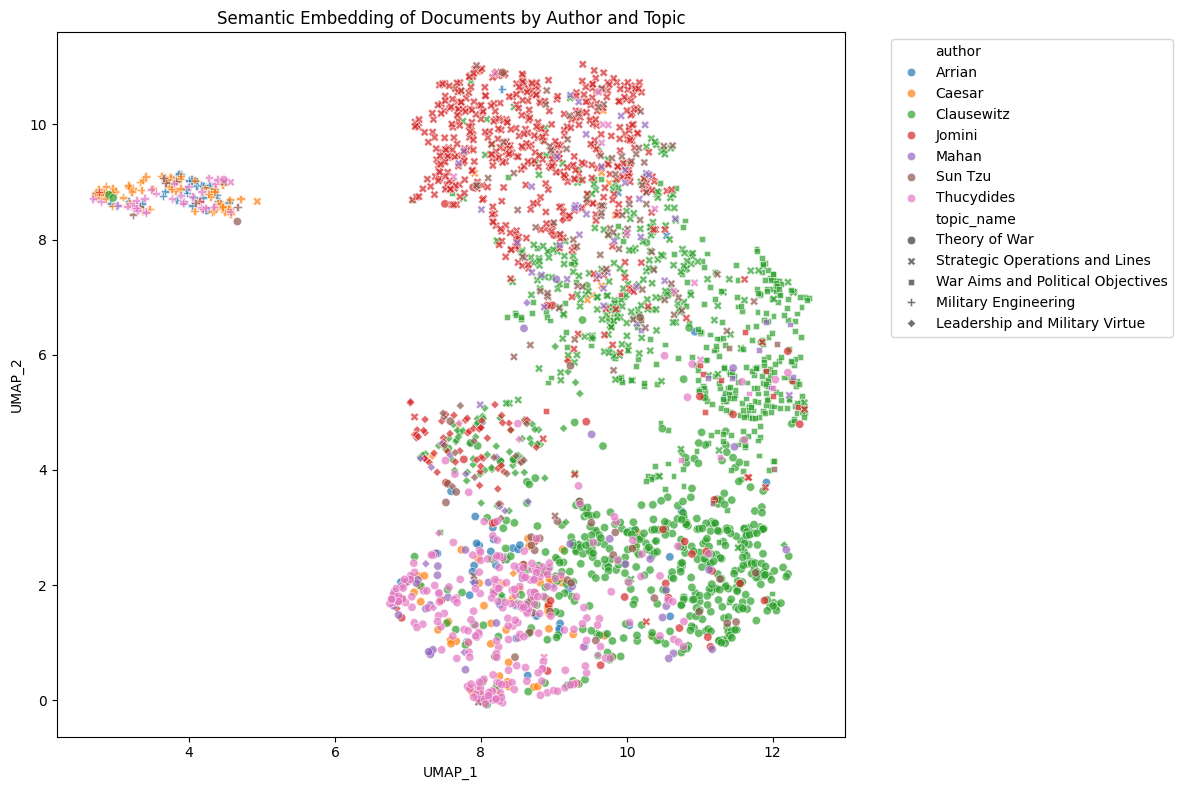

In [101]:
import seaborn as sns

#visualize UMAP embeddings with seaborn
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=document_info_of_interest,
    x="UMAP_1",
    y="UMAP_2",
    hue="author",
    style="topic_name",
    palette="tab10",
    alpha=0.7
)
plt.title("Semantic Embedding of Documents by Author and Topic")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Hierarchical Topic Modeling

In [31]:
#hierarchical topic modeling
hierarchical_topics = topic_model.hierarchical_topics(cleaned_texts)

100%|██████████| 81/81 [00:00<00:00, 294.74it/s]


In [ ]:
#visualize topic hierarchy
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)


In [ ]:
hierarchy_tree = topic_model.get_topic_tree(hierarchical_topics)
print(hierarchy_tree)

.
├─may_sun_lines_must_one
│    ├─may_sun_must_wu_one
│    │    ├─object_theory_therefore_may_art
│    │    │    ├─art_war_science_arts_les
│    │    │    │    ├─art_les_war_logistics_summary
│    │    │    │    │    ├─■──art_logistics_moving_armies_map ── Topic: 99
│    │    │    │    │    └─■──art_les_war_summary_military ── Topic: 44
│    │    │    │    └─■──art_science_arts_war_handicraft ── Topic: 89
│    │    │    └─object_therefore_may_theory_must
│    │    │         ├─object_theory_therefore_means_destruction
│    │    │         │    ├─theory_mind_general_military_generals
│    │    │         │    │    ├─■──mind_feelings_understanding_feeling_boldness ── Topic: 24
│    │    │         │    │    └─theory_military_general_generals_spirit
│    │    │         │    │         ├─■──military_generals_general_spirit_virtue ── Topic: 9
│    │    │         │    │         └─■──theory_historical_theoretical_things_truth ── Topic: 12
│    │    │         │    └─object_destruction_combat_politi